In [7]:
    %load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import cv2
import sys
sys.path.append("/M3")
from M3 import m3F as m3F
from M3 import m3Face as m3Face
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3Batch as m3Batch
from M3 import m3Pre as m3Pre
from M3 import m3Mask as m3Mask
from M3 import m3HoughCircle as m3HoughCircle
from M3 import m3MedianFilter, m3Denoising, retinexRunnable, m3Contrast, m3tv, m3Mask
from M3 import m3Batch as m3Batch
import numpy as np
import cv2

fArray = {retinexRunnable.runMSRCP: {"inputImg": "ignorethis", "show": True},
         m3Face.findEyes: {"inputImg": "ignorethis", "show": True}, 
         m3MedianFilter.medianFilter: {"inputImg": "ignore", "show": True},
         m3F.getRed: {"inputImg": "ignorethis", "show": False},
         #m3Contrast.contrast: {"inputImg": "ignore", "show": False},
         m3tv.denoise_tv_chambolle: {"inputImg": "ignorethis", "weight": 0.1,"eps": 0.0002,"n_iter_max": 200, "multichannel": False, "show": False},
         m3HoughCircle.findCircleSimple: {"inputImg": "ignorethis", "show": False},
         m3Mask.makeCircularOutline: {"inputImg": "ignorethis", "show": False},
         m3Mask.fullImgEyeOutline: {"inputImg": "ignorethis", "show": True}
         #m3Batch.makeComparison: {"faceArray": "ignoreThis", "fileName": "nielzsimpleplusmalte3"}
         }


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 found no faces in this picture\]


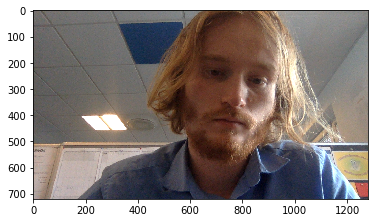

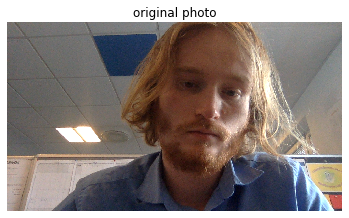

************************************************************            ****************************************************
function name  runMSRCP
function name  findEyes
function name  medianFilter
function name  getRed
function name  denoise_tv_chambolle
function name  findCircleSimple
function name  makeCircularOutline
function name  fullImgEyeOutline
TRALALALLALALAL


UnboundLocalError: local variable 'outputImage' referenced before assignment

In [17]:


cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = m3Batch.batchProcess2(frame, fArray, False, True)
    print(type(frame))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()